1.We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”,identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.[Hint: Refer to LabelEncoder documentation in scikit-learn]

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [2]:
voice=pd.read_csv('voice.csv')
le = preprocessing.LabelEncoder()
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
le.fit(voice.label)
voice.label=le.transform(voice.label)

In [4]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [5]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(voice,test_size=0.3)
print(train.shape)
print(test.shape)

(2217, 21)
(951, 21)


2.Fit a logistic regression model and measure the accuracy on the test set.[Hint:Refer to Linear Models section in scikit-learn]

In [6]:
prediction_var=voice.iloc[:,0:-1]
print(list(prediction_var))

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


In [7]:
train_x=train[prediction_var.columns]
train_y=train['label']
test_x=test[prediction_var.columns]
test_y=test['label']

In [8]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(train_x,train_y)

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
from sklearn import metrics
y_pred=logistic.predict(test_x)
metrics.accuracy_score(y_pred,test_y)

0.886435331230284

3.Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated.  Plot the correlation matrix using seaborn heatmap.[Hint: Explore dataframe methods to identify appropriate method]

In [10]:
import seaborn as sns

In [17]:
corr1=voice.corr()
corr1[(corr1['label']>0.5) | (corr1['label']<-0.5)]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
meanfun,0.460844,-0.466281,0.414909,0.545035,0.155091,-0.534462,-0.167668,-0.194560,-0.513194,-0.421066,...,0.460844,1.000000,0.339387,0.311950,0.270840,0.162163,0.277982,0.275154,-0.054858,-0.833921
label,-0.337415,0.479539,-0.283919,-0.511455,0.066906,0.618916,0.036627,0.087195,0.490552,0.357499,...,-0.337415,-0.833921,-0.136692,-0.166461,-0.191067,-0.194974,-0.195657,-0.192213,0.030801,1.000000


In [ ]:
#sns.pairplot(voice)

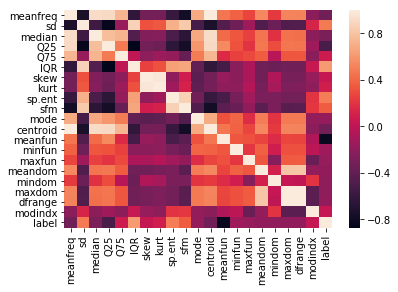

In [19]:
sns.heatmap(corr1)

4.Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.[Hint:Identify correlated variable pairs and remove one among them]


In [20]:
#based on Correlation matrix, removing highly correlated pairs IQR,Q25,meanfun with label
voice2=voice.drop(columns=['IQR','Q25','meanfun'])
voice2.head()

,meanfreq,sd,median,Q75,skew,kurt,sp.ent,sfm,mode,centroid,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.090193,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.092666,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.131908,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.207955,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.206045,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [21]:
prediction_var2=voice2.iloc[:,0:-1]
print(list(prediction_var2))

['meanfreq', 'sd', 'median', 'Q75', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


In [22]:
from sklearn.model_selection import train_test_split
train2,test2=train_test_split(voice2,test_size=0.3)
print(train2.shape)
print(test2.shape)

(2217, 18)
(951, 18)


In [24]:
train_x=train2[prediction_var2.columns]
train_y=train2['label']
test_x=test2[prediction_var2.columns]
test_y=test2['label']

In [26]:
from sklearn.linear_model import LogisticRegression
logistic2=LogisticRegression()
logistic2.fit(train_x,train_y)
from sklearn import metrics
y_pred2=logistic2.predict(test_x)
metrics.accuracy_score(y_pred2,test_y)

D:\softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7402733964248159